<a href="https://colab.research.google.com/github/sajeebju/Assignment-JUHSC/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California House Price Predection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Finding and Filling Null Values

In [ ]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# ratio of the total_bedrooms and total_rooms
divide=df['total_bedrooms']/df['total_rooms']
divide

0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Length: 20640, dtype: float64

In [ ]:
# mean of ratio of the total_bedrooms and total_rooms
mean_of_bedroom_to_total_room=divide.mean()
mean_of_bedroom_to_total_room

0.21303883048085015

In [ ]:
# From the dataset, total_bedrooms are (20% - 30%) of corresponding total_rooms
# To fill the null values of total_bedrooms -
# multiply mean_of_bedroom_to_total_room with df['total_rooms'] for filling corresponding null values

df['total_bedrooms'].fillna(mean_of_bedroom_to_total_room*df['total_rooms'], inplace = True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

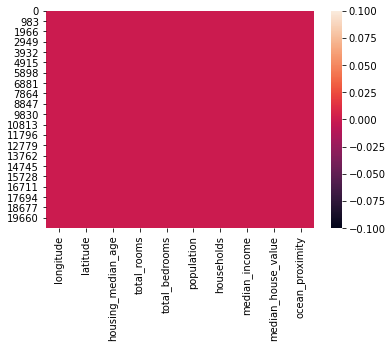

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

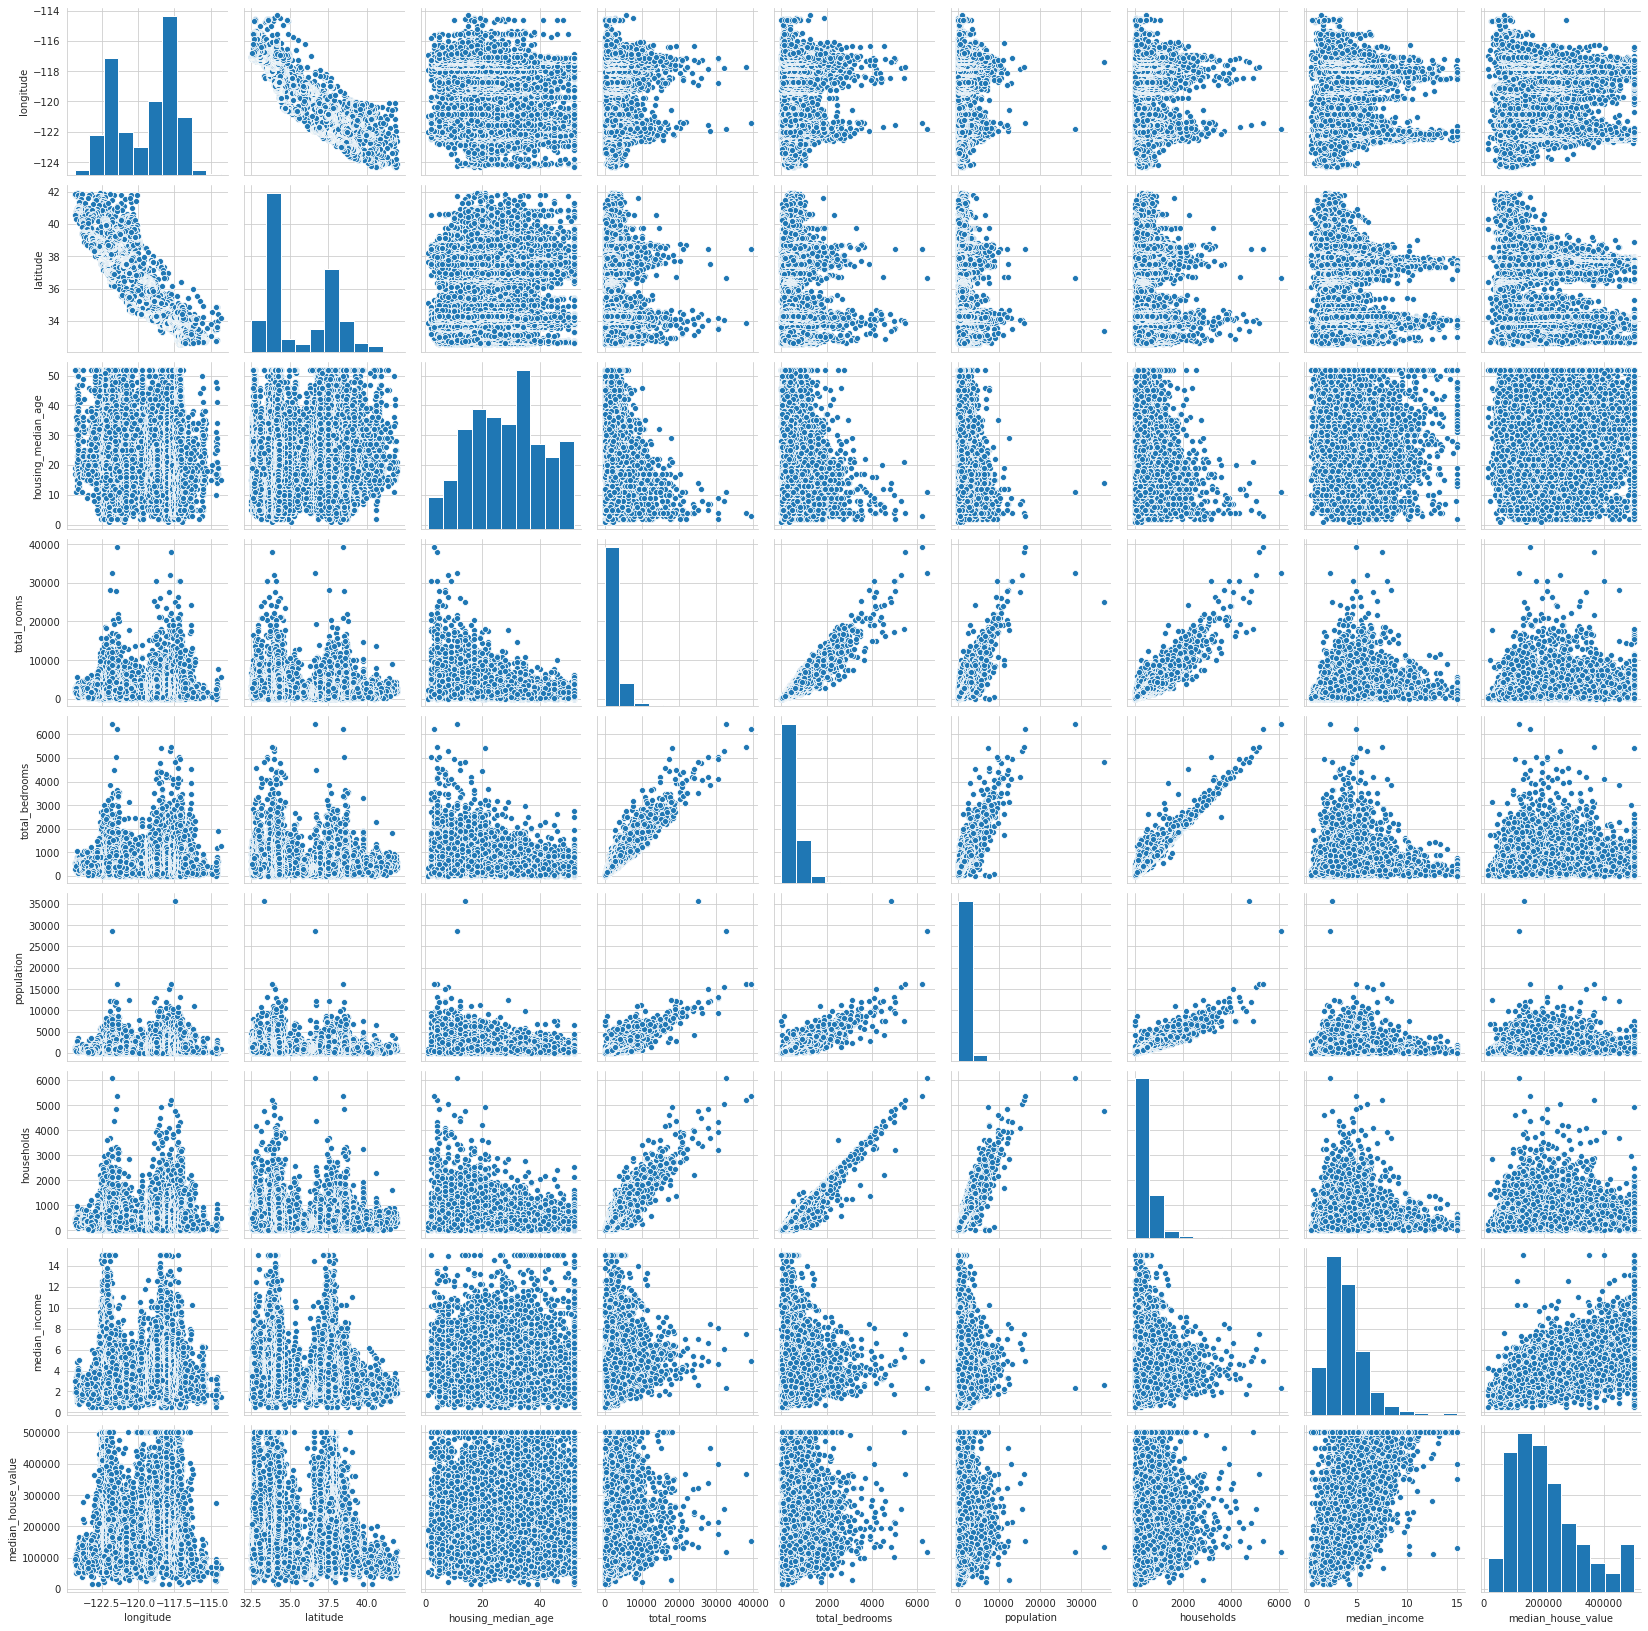

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4287498e0>,
      dtype=object)

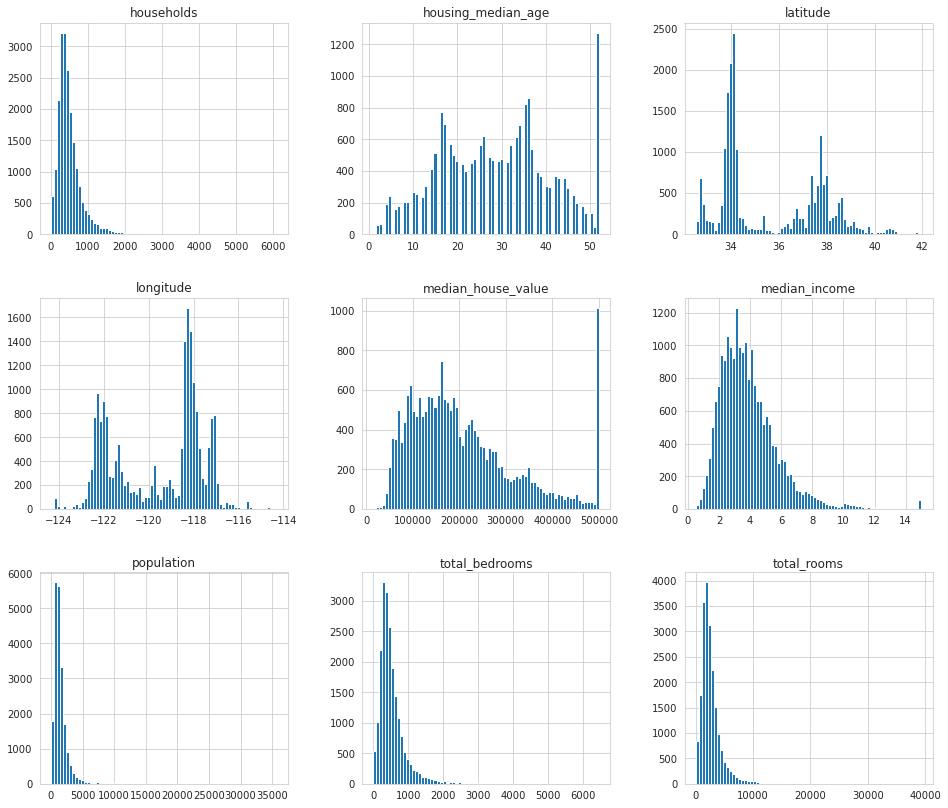

In [ ]:
df.hist(bins=75,figsize=(16,14))

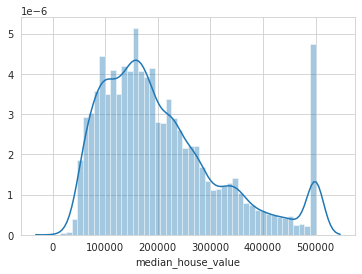

In [ ]:
sns.distplot(df['median_house_value'])

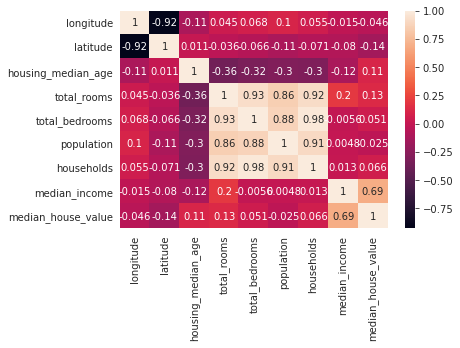

In [ ]:
sns.heatmap(df.corr(), annot = True)

# Input and Target Variables Selection

In [ ]:
y =df['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
X = df.drop('median_house_value', axis = 1)

In [ ]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X['ocean_proximity_n'] = LabelEncoder().fit_transform(X['ocean_proximity'])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,ocean_proximity_n
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3


In [ ]:
X = X.drop('ocean_proximity', axis = 1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_n
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


# Train and Test Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)

0.6198675838502951

In [ ]:
# From the above score this Model is poor for performance

# Evaluating The Model

In [ ]:
print(model.intercept_)

-3561051.980712179


In [ ]:
coef = pd.DataFrame(model.coef_, index = [X.columns], columns=['Coefficient'])
coef

,Coefficient
longitude,-42477.299834
latitude,-42391.409504
housing_median_age,1203.954288
total_rooms,-7.345037
total_bedrooms,100.215176
population,-43.029609
households,70.428195
median_income,40329.434132
ocean_proximity_n,22.103527


# Prediction Example

In [ ]:
y_predict = model.predict([[-122.25, 38, 53, 1280, 300, 600, 300, 7.5, 3]])
y_predict

array([403244.60512885])

# Prediction

In [ ]:
pred = model.predict(X_test)
pred

array([317610.06652519, 549186.90178487, 154885.0217618 , ...,
       106497.20556896,  82111.52287336, 262621.82255388])

# Visualistion

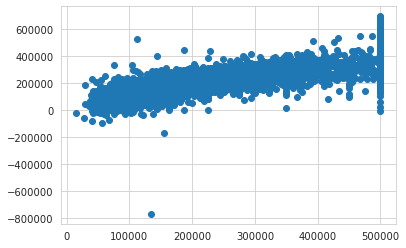

In [ ]:
plt.scatter(y_test,pred)

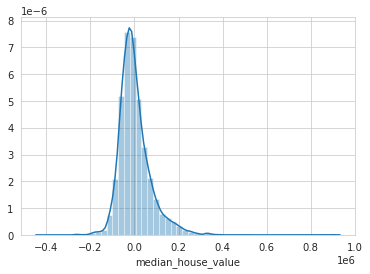

In [ ]:
sns.distplot((y_test-pred),bins=50);

In [ ]:
from sklearn import metrics

print('MAE ->', metrics.mean_absolute_error(y_test, pred))
print('MSE ->', metrics.mean_squared_error(y_test, pred))
print('RMSE ->', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-squared ->', metrics.r2_score(y_test, pred))

MAE -> 51602.26170289079
MSE -> 5144088135.495829
RMSE -> 71722.29873265237
R-squared -> 0.6198675838502951
